# Continuous Peaks Problem

In [10]:
import mlrose_hiive
import time
import numpy as np
import matplotlib.pyplot as plt

References
* [mlrose tutorial](https://github.com/gkhayes/mlrose/blob/master/tutorial_examples.ipynb)
* [mlrose documentation](https://mlrose.readthedocs.io/en/stable/)

In [2]:
problem = mlrose_hiive.ContinuousPeaksGenerator.generate(0, 15)

In [8]:
def find_best_runs(df_run_curves):
    best_fitness = df_run_curves['Fitness'].min()
    best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
    print(best_runs)
    
def fitness_curve(curve, title):
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    length = len(curve)
    y = "Fitness"
    plt.plot(range(length), curve, label="Fitness", lw=2)
    plt.legend(loc="best")
    plt.show()

In [4]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                experiment_name="RHC on CPP",
                seed=0,
                iteration_list=[512],
                max_attempts=300,
                restart_list=[25, 75, 100])   

df_run_stats, df_run_curves = rhc.run()
find_best_runs(df_run_curves)

       Iteration      Time  Fitness   FEvals  Restarts  max_iters  \
1008           1  0.002037      2.0   1023.0        25        512   
1996           1  0.002037      2.0   2024.0        25        512   
9680           1  0.002037      2.0   1023.0        75        512   
10668          1  0.002037      2.0   2024.0        75        512   
35021          1  0.002037      2.0   1023.0       100        512   
36009          1  0.002037      2.0   2024.0       100        512   
63082          1  0.002037      2.0  29415.0       100        512   

       current_restart  
1008                 3  
1996                 6  
9680                 3  
10668                6  
35021                3  
36009                6  
63082               87  


In [7]:
st = time.time()
best_state, best_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                         max_attempts=300,
                                                         max_iters=512,
                                                         random_state=0,
                                                         restarts=75,
                                                         curve=True)
et = time.time()

rhc_wc_time = et - st
print("Time for RHC CPP: ", rhc_wc_time)

Time for RHC CPP:  0.25098705291748047


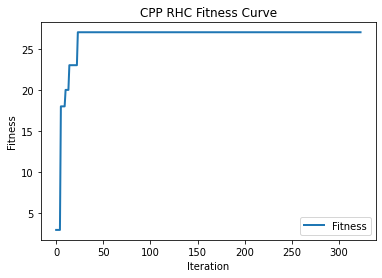

In [11]:
fitness_curve(rhc_curve[:,0], "CPP RHC Fitness Curve")

In [12]:
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA on CPP",
                  seed=0,
                  iteration_list=[512],
                  max_attempts=300,
                  temperature_list=[0.1, 1, 10, 100],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

df_run_stats_sa, df_run_curves_sa = sa.run()
find_best_runs(df_run_curves_sa)

      Iteration      Time  Fitness  FEvals Temperature  max_iters
2557         47  0.002936      2.0    92.0         100        512
2599         89  0.004390      2.0   175.0         100        512
2600         90  0.004420      2.0   177.0         100        512
2611        101  0.004792      2.0   199.0         100        512
2654        144  0.006511      2.0   283.0         100        512
2673        163  0.007372      2.0   321.0         100        512
2702        192  0.008785      2.0   377.0         100        512
2703        193  0.008835      2.0   379.0         100        512
2705        195  0.008937      2.0   383.0         100        512
2708        198  0.009088      2.0   389.0         100        512
2709        199  0.009143      2.0   391.0         100        512
3070         47  0.002936      2.0    92.0         100        512
3112         89  0.004390      2.0   175.0         100        512
3113         90  0.004420      2.0   177.0         100        512
3124      

In [15]:
st = time.time()
best_state, best_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                             max_attempts=300,
                                                             max_iters=512,
                                                             random_state=0,
                                                             schedule=mlrose_hiive.GeomDecay(100),
                                                             curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for SA CPP: ", rhc_wc_time)

Time for SA CPP:  0.25098705291748047


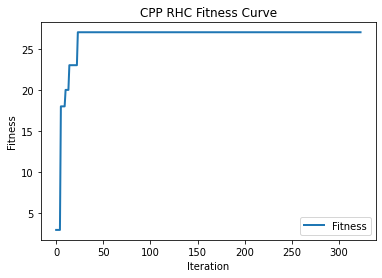

In [16]:
fitness_curve(rhc_curve[:,0], "CPP RHC Fitness Curve")

In [17]:
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA on CPP",
                  seed=0,
                  iteration_list=[512],
                  max_attempts=300,
                  temperature_list=[0.1, 1, 10, 100],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

df_run_stats_sa, df_run_curves_sa = sa.run()
find_best_runs(df_run_curves_sa)

      Iteration      Time  Fitness  FEvals Temperature  max_iters
2557         47  0.002596      2.0    92.0         100        512
2599         89  0.003908      2.0   175.0         100        512
2600         90  0.003939      2.0   177.0         100        512
2611        101  0.004296      2.0   199.0         100        512
2654        144  0.005931      2.0   283.0         100        512
2673        163  0.006757      2.0   321.0         100        512
2702        192  0.008104      2.0   377.0         100        512
2703        193  0.008151      2.0   379.0         100        512
2705        195  0.008252      2.0   383.0         100        512
2708        198  0.008402      2.0   389.0         100        512
2709        199  0.008452      2.0   391.0         100        512
3070         47  0.002596      2.0    92.0         100        512
3112         89  0.003908      2.0   175.0         100        512
3113         90  0.003939      2.0   177.0         100        512
3124      

In [19]:
st = time.time()
best_state, best_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                             max_attempts=300,
                                                             max_iters=512,
                                                             random_state=0,
                                                             schedule=mlrose_hiive.GeomDecay(100),
                                                             curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for SA CPP: ", sa_wc_time)

Time for SA CPP:  0.021473169326782227


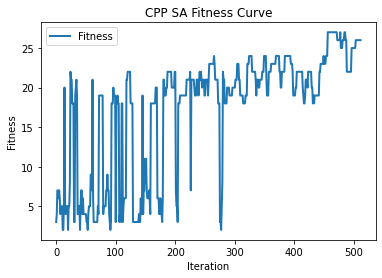

In [20]:
fitness_curve(sa_curve[:,0], "CPP SA Fitness Curve")

In [21]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name="GA on CPP",
                   seed=0,
                   max_attempts=300,
                   iteration_list=[512],
                   population_sizes=[500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5])
df_run_stats_ga, df_run_curves_ga = ga.run()
find_best_runs(df_run_curves_ga)

      Iteration      Time  Fitness  FEvals  Population Size  Mutation Rate  \
0             0  0.016846     19.0   500.0              500           0.10   
302           0  0.016846     19.0   500.0              500           0.25   
604           0  0.016846     19.0   500.0              500           0.50   
906           0  0.016846     19.0  1000.0             1000           0.10   
1208          0  0.016846     19.0  1000.0             1000           0.25   
1510          0  0.016846     19.0  1000.0             1000           0.50   

      max_iters  
0           512  
302         512  
604         512  
906         512  
1208        512  
1510        512  


In [22]:
st = time.time()
best_state, best_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                   max_attempts=300,
                                                   max_iters=512,
                                                   random_state=0,
                                                   pop_size=500,
                                                   mutation_prob=0.10,
                                                   curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for GA CPP: ", sa_wc_time)

Time for GA CPP:  3.93980073928833


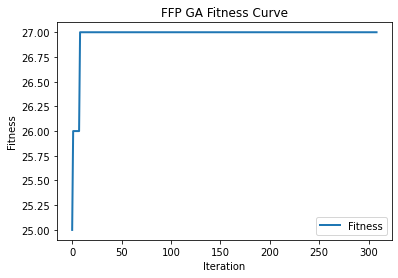

In [23]:
fitness_curve(ga_curve[:,0], "FFP GA Fitness Curve")

In [24]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name="FFP MIMIC Fitness Curve",
                       seed=0,
                       population_sizes=[100, 500, 1000],
                       keep_percent_list=[0.05, 0.1, 0.15],
                       iteration_list=[512],
                       max_attempts=300,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()
find_best_runs(mimic_curve)

      Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
0             0  0.004913     19.0   100.0            True              100   
302           0  0.004913     19.0   100.0            True              100   
605           0  0.004913     19.0   100.0            True              100   
908           0  0.004913     19.0   500.0            True              500   
1210          0  0.004913     19.0   500.0            True              500   
1512          0  0.004913     19.0   500.0            True              500   
1814          0  0.004913     19.0  1000.0            True             1000   
2117          0  0.004913     19.0  1000.0            True             1000   
2420          0  0.004913     19.0  1000.0            True             1000   

      Keep Percent  max_iters  
0             0.05        512  
302           0.10        512  
605           0.15        512  
908           0.05        512  
1210          0.10        512  
1512          0.1

In [25]:
st = time.time()
best_state, best_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                             max_attempts=300,
                                             max_iters=512,
                                             random_state=0,
                                             pop_size=100,
                                             keep_pct=0.05,
                                             curve=True)
et = time.time()
mimic_wc_time = et - st
print("Time for mimic CPP: ", mimic_wc_time)

Time for mimic CPP:  0.7200050354003906


Text(0, 0.5, 'Fitness')

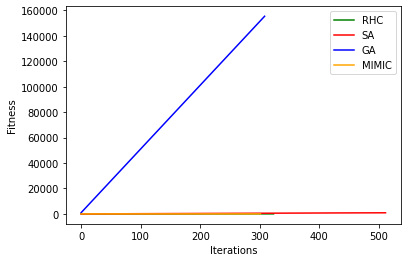

In [26]:
iterations = range(1, 500)
plt.plot(rhc_curve[:, 0], label='RHC', color='green')
plt.plot(sa_curve[:, 1], label='SA', color='red')
plt.plot(ga_curve[:, 1], label='GA', color='blue')
plt.plot(mimic_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")